In [1]:
import pandas as pd
import MySQLdb

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
db = MySQLdb.connect(host="172.18.55.6",    # tu host, usualmente localhost
                     user="comandato",      # tu usuario
                     passwd="comandato123",  # tu password
                     db="SISTEMECUADOR_ATM")        # el nombre de la base de datos

In [4]:
mes=5

In [5]:
writer = pd.ExcelWriter('ASIGNACION MES MARZO.xlsx', engine='xlsxwriter')

In [6]:
totales=""" SELECT *  FROM 
                    SISTEMECUADOR_ATM.MULTAS_MENSUALES 
                where 
                    Mes={0} and anio='2019'""".format(mes)

In [7]:
total=pd.read_sql(totales, con=db)

In [8]:
total.to_excel(writer, sheet_name='TOTAL')
worksheet = writer.sheets['TOTAL']

In [9]:
infractores=""" SELECT Cedula,count(*) as multas,
                    sum(Saldo) as monto,Segmento,Cartera,
                    min(Dias_mora) as menor_mora,max(Dias_mora) as mayor_mora,
                    min(Dia) as ingreso_min,max(Dia) as ingreso_max
                FROM 
                    SISTEMECUADOR_ATM.MULTAS_MENSUALES 
                where 
                    Mes={0} and anio='2019' group by Cedula,Cartera""".format(mes)

In [10]:
resultado=pd.read_sql(infractores, con=db)

In [11]:
resultado.tail()

,Cedula,multas,monto,Segmento,Cartera,menor_mora,mayor_mora,ingreso_min,ingreso_max
28886,FB574080,1,19.3,MULTAS NUEVAS,CORRIENTE,303,303,1,1
28887,FB587397,1,19.3,MULTAS NUEVAS,CORRIENTE,302,302,1,1
28888,I685506,1,57.9,MULTAS NUEVAS,CORRIENTE,159,159,1,1
28889,NMRDK74F5,2,433.4,DEFAULT,CORRIENTE,36,130,1,20
28890,XDA822644,4,407.7,MULTAS NUEVAS,CORRIENTE,42,355,1,1


In [12]:
def agregar_ceros(base):
    ced=base['Cedula']
    if len(ced)==9 or len(ced)==12 :
        if ced.isdigit():
            return '0'+ced
    return ced

In [13]:
resultado['Cedula']=resultado.apply(agregar_ceros,axis=1)

In [14]:
resultado.head()

,Cedula,multas,monto,Segmento,Cartera,menor_mora,mayor_mora,ingreso_min,ingreso_max
0,00042448K,1,115.8,MULTAS NUEVAS,CORRIENTE,191,191,1,1
1,0100025030,1,19.3,MULTAS NUEVAS,CORRIENTE,368,368,1,1
2,1000559797,5,248.8,MULTAS NUEVAS,CORRIENTE,100,548,1,1
3,1000584647,1,57.9,MULTAS NUEVAS,CORRIENTE,348,348,1,1
4,1000620623,2,38.6,MULTAS NUEVAS,CORRIENTE,205,261,1,1


In [15]:
multas=""" SELECT Dia,count(*) as num_multas,sum(Saldo) as monto
                FROM 
                    SISTEMECUADOR_ATM.MULTAS_MENSUALES 
                where 
                    Mes={0} and anio='2019' group by Dia""".format(mes)

In [16]:
resultado_multas=pd.read_sql(multas, con=db)

In [17]:
resultado.groupby(['ingreso_min']).Cedula.count()

ingreso_min
1     28706
6        43
9         1
10        2
13       19
14        5
15        4
16        3
17        4
20      101
21        3
Name: Cedula, dtype: int64

In [18]:
resultado_multas

,Dia,num_multas,monto
0,1,46877,3891695.41
1,2,33,3535.20
2,6,298,27621.75
3,7,86,9790.90
4,8,32,3605.10
5,9,40,4311.90
6,10,59,9554.50
7,13,196,17592.10
8,14,75,9574.20
9,15,38,6557.70


In [26]:
resultado_multas.sum()

num_multas      48255.00
monto         4049089.11
dtype: float64

In [19]:
resultado.to_excel(writer, sheet_name='BASE')
worksheet = writer.sheets['BASE']

In [20]:
resultado_multas.to_excel(writer, sheet_name='multas')
worksheet = writer.sheets['multas']

In [21]:
writer.save()

In [22]:
resultado_multas.set_index('Dia',inplace=True)

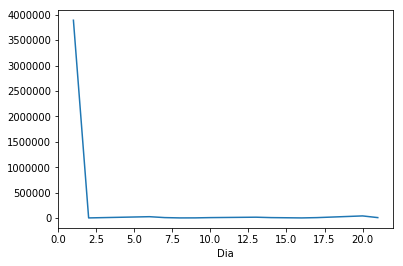

In [23]:
resultado_multas['monto'][:].plot.line()

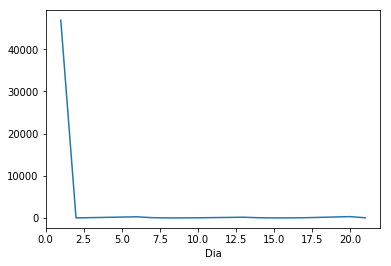

In [24]:
resultado_multas[:]['num_multas'].plot.line()

In [25]:
resultado_multas.sum()

num_multas      48255.00
monto         4049089.11
dtype: float64